In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df_1 = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')
df_2 = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
df_3 = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')
df_4 = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

C:\Users\Thimmie\AppData\Local\Temp\ipykernel_8548\3551181374.py:4: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4 = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')


In [3]:
df_1.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content',
       ...
       'Video Removed from Playlists', 'Annotation Impressions',
       'Annotation Clickable Impressions', 'Annotation Closable Impressions',
       'Annotation Closes', 'Card Impressions', 'Card Teaser Impressions',
       'Card Teaser Clicks', 'Poll Votes', 'Tags'],
      dtype='object', length=147)

In [4]:
list_ = [i for i in df_1.columns if i in df_2.columns and i in df_3.columns and i in df_4.columns]

In [5]:
len(list_)

147

In [6]:
len(df_1.columns), len(df_2.columns), len(df_3.columns), len(df_4.columns)

(147, 147, 147, 147)

In [7]:
df = pd.concat([df_1, df_2, df_3, df_4], axis = 0)

In [8]:
for i in df.columns:
    print(f"{i} ------------ {df[i].isna().sum()}")

Date ------------ 0
Post ID ------------ 0
Network ------------ 0
Post Type ------------ 0
Content Type ------------ 0
Profile ------------ 0
Sent by ------------ 0
Link ------------ 52
Post ------------ 292
Linked Content ------------ 21545
Impressions ------------ 4509
Organic Impressions ------------ 4509
Viral Impressions ------------ 27199
Non-viral Impressions ------------ 27199
Paid Impressions ------------ 27199
Fan Impressions ------------ 27199
Fan Organic Impressions ------------ 27199
Fan Paid Impressions ------------ 27199
Non-fan Impressions ------------ 27199
Non-fan Organic Impressions ------------ 27199
Non-fan Paid Impressions ------------ 27199
Reach ------------ 18683
Organic Reach ------------ 18683
Viral Reach ------------ 27199
Non-viral Reach ------------ 27199
Paid Reach ------------ 27199
Fan Reach ------------ 27199
Fan Paid Reach ------------ 27199
Potential Reach ------------ 27643
Engagement Rate (per Impression) ------------ 5943
Engagement Rate (per Reac

In [9]:
for i in df.columns:
    if df[i].isna().sum() > 20000:
        df.drop(i, axis=1, inplace = True)

In [10]:
df.shape

(36092, 22)

In [11]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All)
0,12/17/2022 17:08,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,207378.0,207378.0,0.00,1024.0,179.0,176.0,59.0,2.0,0.0,784.0,784.0
1,5/4/2019 10:01,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,125784.0,92009.0,92009.0,0.05,5876.0,762.0,747.0,572.0,47.0,0.0,4495.0,4495.0
2,6/2/2020 21:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,89699.0,84347.0,84347.0,0.05,4744.0,465.0,458.0,855.0,29.0,0.0,3395.0,3395.0
3,5/9/2022 10:37,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,79118.0,78407.0,78407.0,0.01,445.0,102.0,101.0,11.0,2.0,0.0,330.0,330.0
4,7/18/2021 10:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,76759.0,74035.0,74035.0,0.06,4730.0,413.0,383.0,869.0,10.0,0.0,3438.0,3438.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36092 entries, 0 to 8528
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              36092 non-null  object 
 1   Post ID                           36092 non-null  object 
 2   Network                           36092 non-null  object 
 3   Post Type                         36092 non-null  object 
 4   Content Type                      36092 non-null  object 
 5   Profile                           36092 non-null  object 
 6   Sent by                           36092 non-null  object 
 7   Link                              36040 non-null  object 
 8   Post                              35800 non-null  object 
 9   Impressions                       31583 non-null  float64
 10  Organic Impressions               31583 non-null  float64
 11  Reach                             17409 non-null  float64
 12  Organ

In [13]:
df = df.dropna(subset = ['Engagements'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33067 entries, 0 to 8417
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              33067 non-null  object 
 1   Post ID                           33067 non-null  object 
 2   Network                           33067 non-null  object 
 3   Post Type                         33067 non-null  object 
 4   Content Type                      33067 non-null  object 
 5   Profile                           33067 non-null  object 
 6   Sent by                           33067 non-null  object 
 7   Link                              33040 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31583 non-null  float64
 10  Organic Impressions               31583 non-null  float64
 11  Reach                             17409 non-null  float64
 12  Organ

In [15]:
for i in range(len(df['Impressions'])):
        df['Engagement Rate (per Impression)'].values[i] = df['Engagements'].values[i]/df['Impressions'].values[i]
                

C:\Users\Thimmie\AppData\Local\Temp\ipykernel_8548\1592264126.py:2: RuntimeWarning: invalid value encountered in double_scalars
  df['Engagement Rate (per Impression)'].values[i] = df['Engagements'].values[i]/df['Impressions'].values[i]
C:\Users\Thimmie\AppData\Local\Temp\ipykernel_8548\1592264126.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  df['Engagement Rate (per Impression)'].values[i] = df['Engagements'].values[i]/df['Impressions'].values[i]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33067 entries, 0 to 8417
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              33067 non-null  object 
 1   Post ID                           33067 non-null  object 
 2   Network                           33067 non-null  object 
 3   Post Type                         33067 non-null  object 
 4   Content Type                      33067 non-null  object 
 5   Profile                           33067 non-null  object 
 6   Sent by                           33067 non-null  object 
 7   Link                              33040 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31583 non-null  float64
 10  Organic Impressions               31583 non-null  float64
 11  Reach                             17409 non-null  float64
 12  Organ

In [17]:
df2 = df[['Impressions', 'Reach', 'Engagements']].dropna()

In [18]:
from sklearn.model_selection import train_test_split

x = df2.drop('Reach', axis = 1)
y = df2['Reach']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2023)


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
model.fit(x, y)

RandomForestRegressor()

In [20]:
list_ = []
for i in range(len(df['Reach'])):
    if df['Reach'].isna().values[i] == True:
        list_.append(i)

In [21]:
list2_ = df[df['Reach'].isna() & df['Impressions'].notna()]['Post ID']

In [22]:
list3_ = df[df['Post ID'].isin(list2_)]

In [23]:
list3_

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All)
2,7/12/2023 19:00,7084950000000000000.0,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPos...,Sade was able to acquire a home loan and make ...,63.0,63.0,NaN,NaN,0.095238,6.0,3.0,3.0,0.0,0.0,0.05,NaN,3.0
3,7/11/2023 14:49,7084530000000000000.0,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Safeguard every aspect of your operations with...,164.0,164.0,NaN,NaN,0.018293,3.0,1.0,1.0,0.0,0.0,0.01,NaN,2.0
4,7/11/2023 9:17,7084450000000000000.0,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"Together, we can make a difference and build a...",376.0,376.0,NaN,NaN,0.050532,19.0,11.0,11.0,0.0,0.0,0.02,NaN,8.0
5,7/10/2023 18:04,7084220000000000000.0,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"Hey CEOs, it’s time to say goodbye to complexi...",343.0,343.0,NaN,NaN,0.020408,7.0,0.0,0.0,0.0,0.0,0.02,NaN,7.0
6,7/10/2023 16:21,7084190000000000000.0,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,With the Stanbic IBTC SME Online-Bento Redirec...,418.0,418.0,NaN,NaN,0.047847,20.0,9.0,9.0,0.0,1.0,0.02,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,10/9/2014 16:02,520228000000000000.0,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/5202279...,Welcome everyone to another #MovingForwardNG s...,791.0,791.0,NaN,NaN,0.002528,2.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0
8414,10/9/2014 15:00,520212000000000000.0,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/5202120...,1 hour to the #MovingForwardNG conversation wi...,2397.0,2397.0,NaN,NaN,0.006675,16.0,0.0,0.0,0.0,0.0,NaN,16.0,16.0
8415,10/9/2014 14:00,520197000000000000.0,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/5201969...,Join the #MovingForwardNG conversation from 4p...,1008.0,1008.0,NaN,NaN,0.001984,2.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0
8416,10/9/2014 12:00,520167000000000000.0,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/5201667...,"Join us in conversation with @VusiThembekwayo,...",2192.0,2192.0,NaN,NaN,0.004106,9.0,0.0,0.0,0.0,0.0,NaN,9.0,9.0


In [24]:
preds = model.predict(list3_[['Impressions', 'Engagements']])

In [25]:
len(preds), len(list3_.index)

(14174, 14174)

In [26]:
condition = df[df['Post ID'].isin(list2_)]

df.loc[df['Post ID'].isin(list3_['Post ID']), 'Reach'] = preds

In [27]:
df['Reach']

0       207378.00
1        92009.00
2        84347.00
3        78407.00
4        74035.00
          ...    
8413       698.44
8414      2162.19
8415       902.53
8416      1866.69
8417      1089.52
Name: Reach, Length: 33067, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33067 entries, 0 to 8417
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              33067 non-null  object 
 1   Post ID                           33067 non-null  object 
 2   Network                           33067 non-null  object 
 3   Post Type                         33067 non-null  object 
 4   Content Type                      33067 non-null  object 
 5   Profile                           33067 non-null  object 
 6   Sent by                           33067 non-null  object 
 7   Link                              33040 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31583 non-null  float64
 10  Organic Impressions               31583 non-null  float64
 11  Reach                             31583 non-null  float64
 12  Organ

In [29]:
df = df.dropna(subset = 'Post')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32875 entries, 0 to 8417
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              32875 non-null  object 
 1   Post ID                           32875 non-null  object 
 2   Network                           32875 non-null  object 
 3   Post Type                         32875 non-null  object 
 4   Content Type                      32875 non-null  object 
 5   Profile                           32875 non-null  object 
 6   Sent by                           32875 non-null  object 
 7   Link                              32848 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31393 non-null  float64
 10  Organic Impressions               31393 non-null  float64
 11  Reach                             31393 non-null  float64
 12  Organ

In [31]:
df = df.drop(['Click-Through Rate', 'Other Post Clicks', 'Post Clicks (All)'], axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32875 entries, 0 to 8417
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              32875 non-null  object 
 1   Post ID                           32875 non-null  object 
 2   Network                           32875 non-null  object 
 3   Post Type                         32875 non-null  object 
 4   Content Type                      32875 non-null  object 
 5   Profile                           32875 non-null  object 
 6   Sent by                           32875 non-null  object 
 7   Link                              32848 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31393 non-null  float64
 10  Organic Impressions               31393 non-null  float64
 11  Reach                             31393 non-null  float64
 12  Organ

In [33]:
df = df.drop(['Organic Reach', 'Shares', 'Organic Impressions'], axis = 1)

In [34]:
#df = df.drop('Link', axis = 1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32875 entries, 0 to 8417
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              32875 non-null  object 
 1   Post ID                           32875 non-null  object 
 2   Network                           32875 non-null  object 
 3   Post Type                         32875 non-null  object 
 4   Content Type                      32875 non-null  object 
 5   Profile                           32875 non-null  object 
 6   Sent by                           32875 non-null  object 
 7   Link                              32848 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       31393 non-null  float64
 10  Reach                             31393 non-null  float64
 11  Engagement Rate (per Impression)  31372 non-null  float64
 12  Engag

In [36]:
df[['Impressions', 'Reach', 'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes', 'Comments']] = np.abs(df[['Impressions', 'Reach', 'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes', 'Comments']])

In [37]:
df.describe()

,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments
count,31393.000000,31393.000000,3.137200e+04,32875.000000,32875.000000,32875.000000,32875.000000
mean,3261.269837,2699.798373,inf,127.908989,59.900958,59.158327,9.551361
std,4670.722328,4156.289518,NaN,745.445530,690.526037,688.822859,35.122876
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1037.000000,578.650000,1.975052e-02,27.000000,10.000000,10.000000,0.000000
50%,2059.000000,1497.000000,2.757209e-02,56.000000,24.000000,24.000000,2.000000
75%,3757.000000,3340.000000,3.950834e-02,110.000000,54.000000,54.000000,8.000000
max,207378.000000,207378.000000,inf,72474.000000,70484.000000,70244.000000,1552.000000


In [38]:
df['Reach'] = df['Reach'].fillna(df['Reach'].median())

In [39]:
df['Impressions'].fillna(df['Impressions'].median(), inplace = True)

In [40]:
df['Engagement Rate (per Impression)'] = df['Engagements']/df['Impressions']

In [41]:
df['Engagement Rate (per Impression)'].fillna(0, inplace = True)

In [42]:
df['Engagement Rate (per Reach)'] = df['Engagements']/df['Reach']

In [43]:
df['Engagement Rate (per Reach)'].fillna(0, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32875 entries, 0 to 8417
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              32875 non-null  object 
 1   Post ID                           32875 non-null  object 
 2   Network                           32875 non-null  object 
 3   Post Type                         32875 non-null  object 
 4   Content Type                      32875 non-null  object 
 5   Profile                           32875 non-null  object 
 6   Sent by                           32875 non-null  object 
 7   Link                              32848 non-null  object 
 8   Post                              32875 non-null  object 
 9   Impressions                       32875 non-null  float64
 10  Reach                             32875 non-null  float64
 11  Engagement Rate (per Impression)  32875 non-null  float64
 12  Engag

In [45]:
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df['HourofDay'] = df['Date'].dt.hour

In [47]:
time_of_day = []
for i in df['HourofDay'].values:
    if i > 12 and i < 19:
        time_of_day.append('Afternoon')
    elif i >= 19:
        time_of_day.append('Night')
    else:
        time_of_day.append('Morning')

In [48]:
df['TimeofPost'] = time_of_day

In [49]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay,TimeofPost
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,0.004938,1024.0,179.0,176.0,59.0,0.004938,17,Afternoon
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,92009.0,0.046715,5876.0,762.0,747.0,572.0,0.063863,10,Morning
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,84347.0,0.052888,4744.0,465.0,458.0,855.0,0.056244,21,Night
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,78407.0,0.005625,445.0,102.0,101.0,11.0,0.005676,10,Morning
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,74035.0,0.061621,4730.0,413.0,383.0,869.0,0.063889,10,Morning


In [50]:
df.describe()

,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay
count,32875.000000,32875.000000,3.287500e+04,32875.000000,32875.000000,32875.000000,32875.000000,3.287500e+04,32875.000000
mean,3207.071696,2645.576406,inf,127.908989,59.900958,59.158327,9.551361,inf,13.588441
std,4571.038869,4069.183710,NaN,745.445530,690.526037,688.822859,35.122876,NaN,3.746319
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1073.000000,617.000000,1.923077e-02,27.000000,10.000000,10.000000,0.000000,2.131310e-02,10.000000
50%,2059.000000,1497.000000,2.704117e-02,56.000000,24.000000,24.000000,2.000000,3.107861e-02,13.000000
75%,3638.500000,3230.480000,3.877666e-02,110.000000,54.000000,54.000000,8.000000,5.597006e-02,17.000000
max,207378.000000,207378.000000,inf,72474.000000,70484.000000,70244.000000,1552.000000,inf,23.000000


In [51]:
list_ = []

df['LenOftext'] = [len(i) for i in df['Post'].values]

for i in df['LenOftext'].values:
    if i > (df['LenOftext'].mean() + (df['LenOftext'].std()*1.2)):
        list_.append('Lengthy')
    elif i < (df['LenOftext'].mean() - (df['LenOftext'].std()*1.2)):
        list_.append('Short')
    else:
        list_.append('Average')
        
df['LengthofText'] = list_


In [52]:
df = df.replace([np.inf, -np.inf], 0)

In [53]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay,TimeofPost,LenOftext,LengthofText
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,0.004938,1024.0,179.0,176.0,59.0,0.004938,17,Afternoon,143,Average
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,92009.0,0.046715,5876.0,762.0,747.0,572.0,0.063863,10,Morning,89,Average
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,84347.0,0.052888,4744.0,465.0,458.0,855.0,0.056244,21,Night,175,Average
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,78407.0,0.005625,445.0,102.0,101.0,11.0,0.005676,10,Morning,104,Average
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,74035.0,0.061621,4730.0,413.0,383.0,869.0,0.063889,10,Morning,56,Average


In [54]:
df['LengthofText'].value_counts()

Average    30411
Lengthy     1872
Short        592
Name: LengthofText, dtype: int64

In [55]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['DayOfWeek'] = df['DayOfWeek'].replace({0:'Monday',
                                           1: 'Tuesday',
                                           2: 'Wednesday',
                                           3: 'Thursday',
                                           4: 'Friday',
                                           5: 'Saturday',
                                           6: 'Sunday'})

In [56]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay,TimeofPost,LenOftext,LengthofText,DayOfWeek
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,0.004938,1024.0,179.0,176.0,59.0,0.004938,17,Afternoon,143,Average,Saturday
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,92009.0,0.046715,5876.0,762.0,747.0,572.0,0.063863,10,Morning,89,Average,Saturday
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,84347.0,0.052888,4744.0,465.0,458.0,855.0,0.056244,21,Night,175,Average,Tuesday
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,78407.0,0.005625,445.0,102.0,101.0,11.0,0.005676,10,Morning,104,Average,Monday
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,74035.0,0.061621,4730.0,413.0,383.0,869.0,0.063889,10,Morning,56,Average,Sunday


In [57]:
df = df[df['Engagement Rate (per Reach)'] <= 1]
df = df[df['Engagement Rate (per Impression)'] <= 1]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31255 entries, 0 to 8417
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              31255 non-null  datetime64[ns]
 1   Post ID                           31255 non-null  object        
 2   Network                           31255 non-null  object        
 3   Post Type                         31255 non-null  object        
 4   Content Type                      31255 non-null  object        
 5   Profile                           31255 non-null  object        
 6   Sent by                           31255 non-null  object        
 7   Link                              31228 non-null  object        
 8   Post                              31255 non-null  object        
 9   Impressions                       31255 non-null  float64       
 10  Reach                             31255 non-nul

<Axes: xlabel='Engagements', ylabel='Count'>

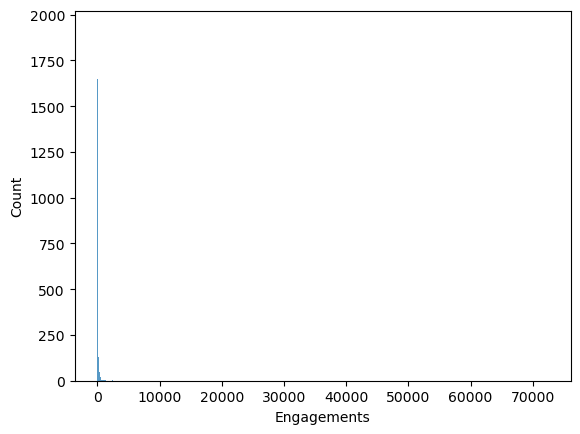

In [59]:
sns.histplot(data=df, x='Engagements')

<Axes: xlabel='Reach', ylabel='Count'>

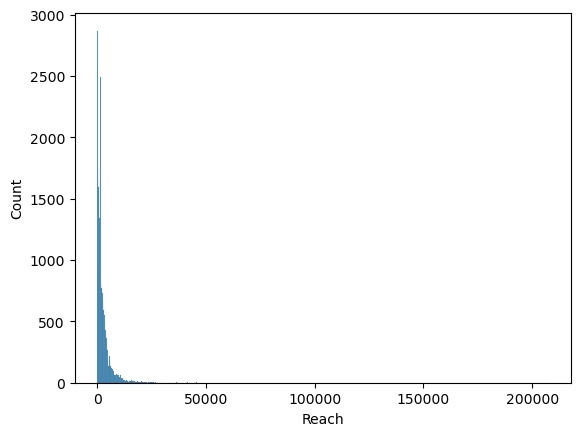

In [60]:
sns.histplot(data=df, x='Reach')

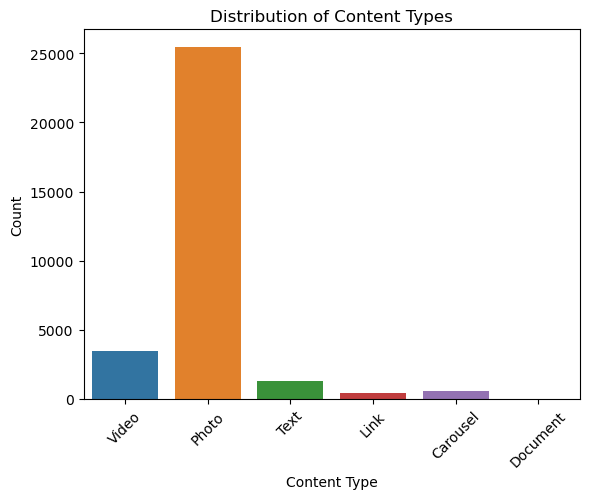

In [61]:
sns.countplot(data=df, x='Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.xticks(rotation=45)
plt.show()


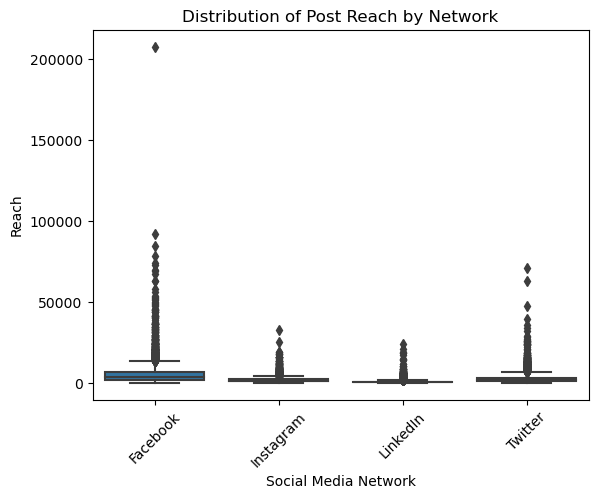

In [62]:
sns.boxplot(data=df, x='Network', y='Reach')
plt.xlabel('Social Media Network')
plt.ylabel('Reach')
plt.title('Distribution of Post Reach by Network')
plt.xticks(rotation=45)
plt.show()


C:\Users\Thimmie\AppData\Local\Temp\ipykernel_8548\1256883451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


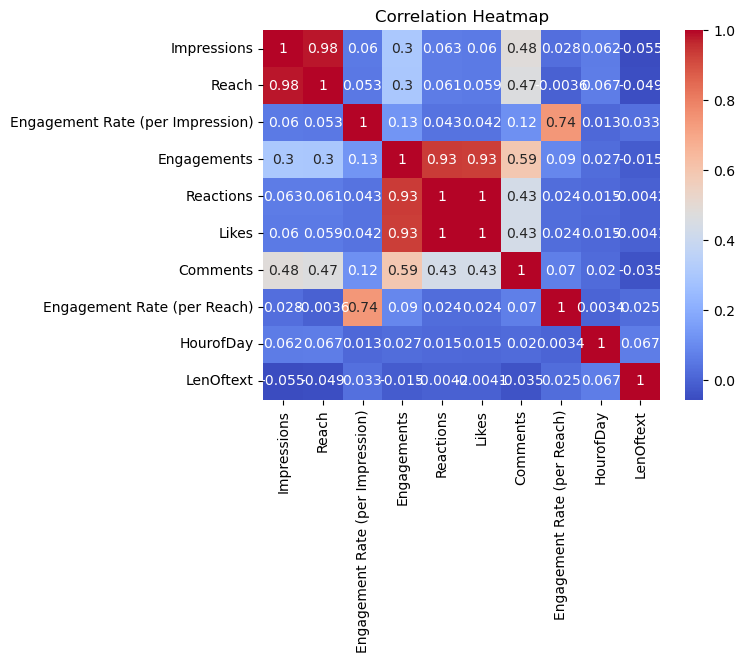

In [63]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


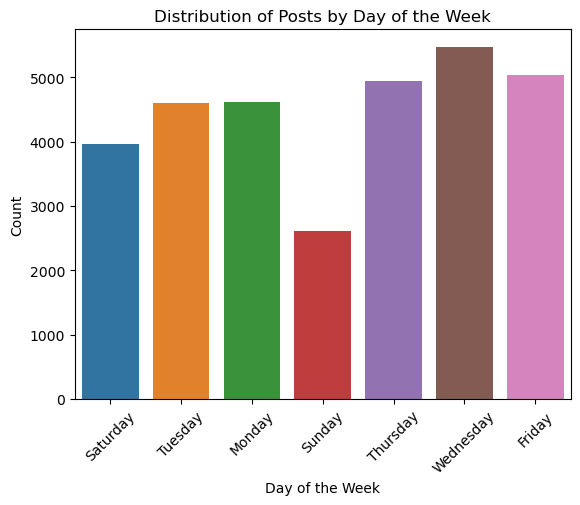

In [64]:
sns.countplot(data=df, x='DayOfWeek')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Posts by Day of the Week')
plt.xticks(rotation=45)
plt.show()


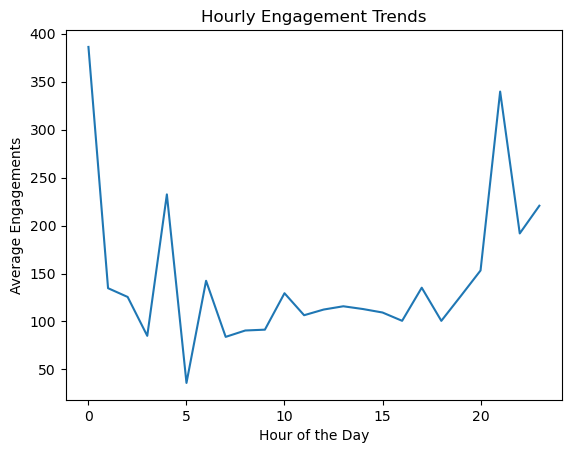

In [65]:
hourly_engagements = df.groupby('HourofDay')['Engagements'].mean().reset_index()
sns.lineplot(data=hourly_engagements, x='HourofDay', y='Engagements')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.title('Hourly Engagement Trends')
plt.show()


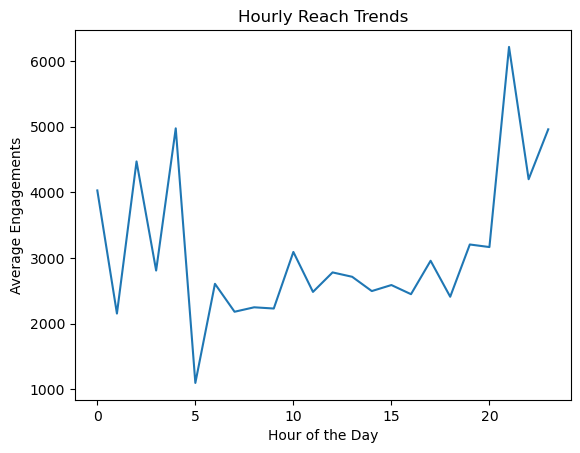

In [66]:
hourly_engagements = df.groupby('HourofDay')['Reach'].mean().reset_index()
sns.lineplot(data=hourly_engagements, x='HourofDay', y='Reach')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.title('Hourly Reach Trends')
plt.show()


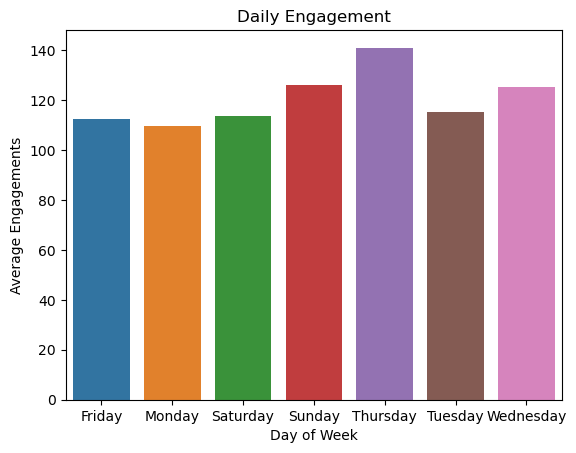

In [67]:
Daily_engagements = df.groupby('DayOfWeek')['Engagements'].mean().reset_index()
sns.barplot(data=Daily_engagements, x='DayOfWeek', y='Engagements')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagements')
plt.title('Daily Engagement')
plt.show()


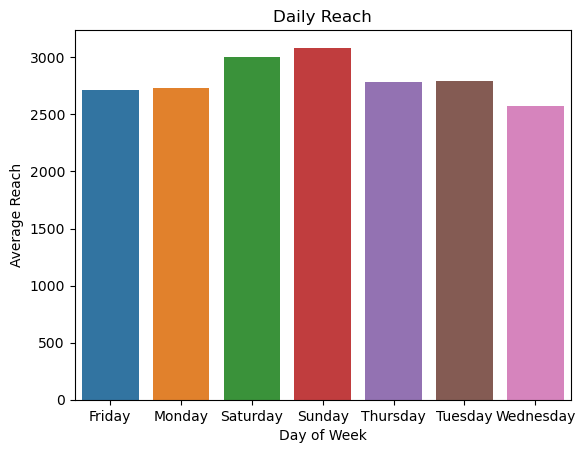

In [68]:
Daily_engagements = df.groupby('DayOfWeek')['Reach'].mean().reset_index()
sns.barplot(data=Daily_engagements, x='DayOfWeek', y='Reach')
plt.xlabel('Day of Week')
plt.ylabel('Average Reach')
plt.title('Daily Reach')
plt.show()


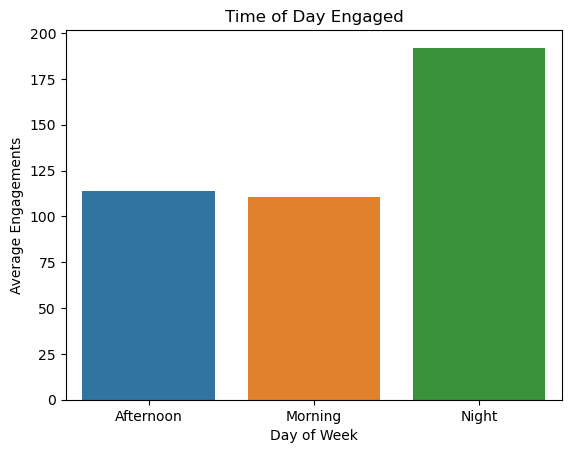

In [69]:
time_engagements = df.groupby('TimeofPost')['Engagements'].mean().reset_index()
sns.barplot(data=time_engagements, x='TimeofPost', y='Engagements')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagements')
plt.title('Time of Day Engaged')
plt.show()


<Axes: xlabel='TimeofPost', ylabel='count'>

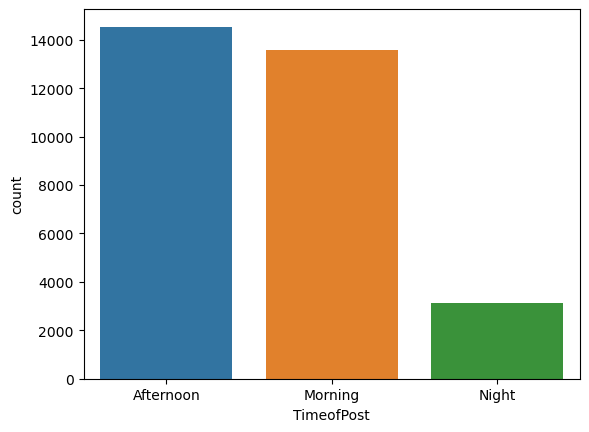

In [70]:
sns.countplot(x='TimeofPost', data=df)

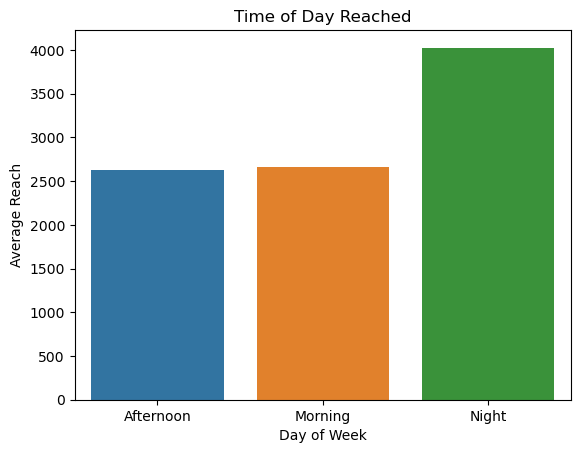

In [71]:
time_engagements = df.groupby('TimeofPost')['Reach'].mean().reset_index()
sns.barplot(data=time_engagements, x='TimeofPost', y='Reach')
plt.xlabel('Day of Week')
plt.ylabel('Average Reach')
plt.title('Time of Day Reached')
plt.show()


In [72]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay,TimeofPost,LenOftext,LengthofText,DayOfWeek
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,0.004938,1024.0,179.0,176.0,59.0,0.004938,17,Afternoon,143,Average,Saturday
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,92009.0,0.046715,5876.0,762.0,747.0,572.0,0.063863,10,Morning,89,Average,Saturday
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,84347.0,0.052888,4744.0,465.0,458.0,855.0,0.056244,21,Night,175,Average,Tuesday
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,78407.0,0.005625,445.0,102.0,101.0,11.0,0.005676,10,Morning,104,Average,Monday
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,74035.0,0.061621,4730.0,413.0,383.0,869.0,0.063889,10,Morning,56,Average,Sunday


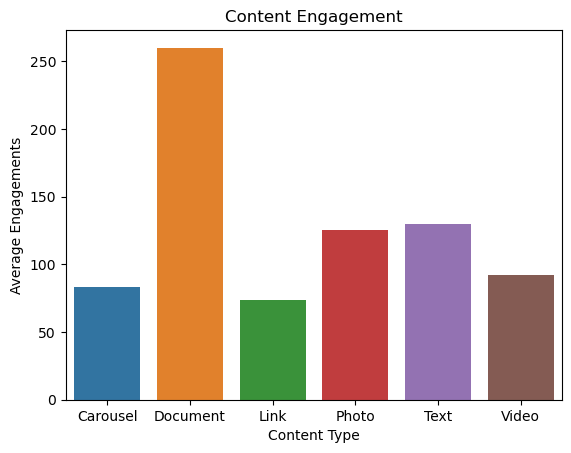

In [73]:
Content_engagements = df.groupby('Content Type')['Engagements'].mean().reset_index()
sns.barplot(data=Content_engagements, x='Content Type', y='Engagements')
plt.xlabel('Content Type')
plt.ylabel('Average Engagements')
plt.title('Content Engagement')
plt.show()


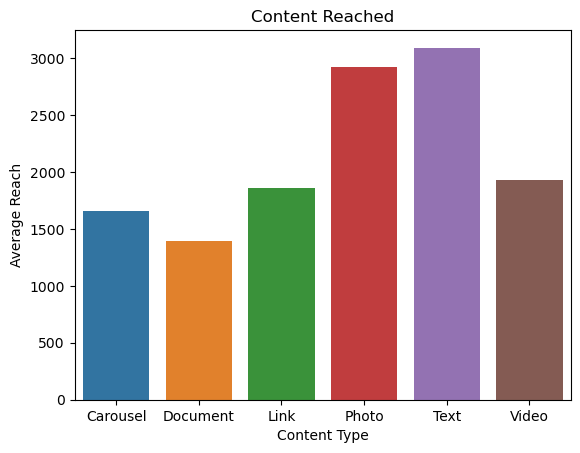

In [74]:
Content_engagements = df.groupby('Content Type')['Reach'].mean().reset_index()
sns.barplot(data=Content_engagements, x='Content Type', y='Reach')
plt.xlabel('Content Type')
plt.ylabel('Average Reach')
plt.title('Content Reached')
plt.show()


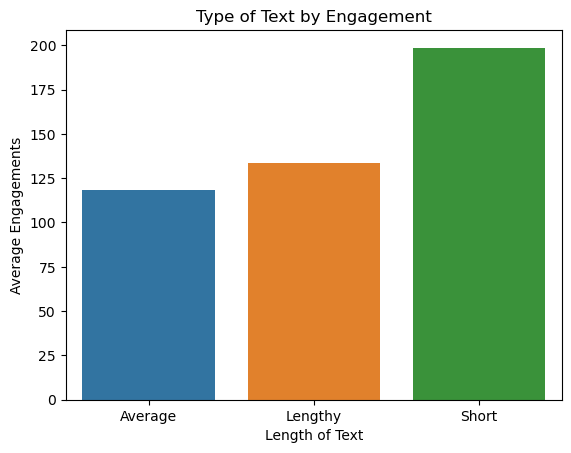

In [75]:
lot_engagements = df.groupby('LengthofText')['Engagements'].mean().reset_index()
sns.barplot(data=lot_engagements, x='LengthofText', y='Engagements')
plt.xlabel('Length of Text')
plt.ylabel('Average Engagements')
plt.title('Type of Text by Engagement')
plt.show()


<Axes: xlabel='LengthofText', ylabel='count'>

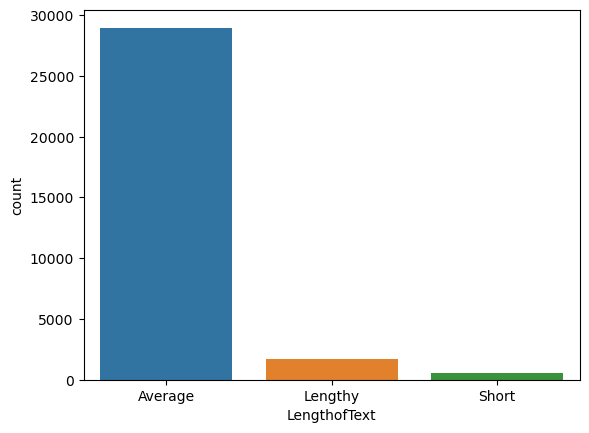

In [76]:
sns.countplot(x='LengthofText', data=df)

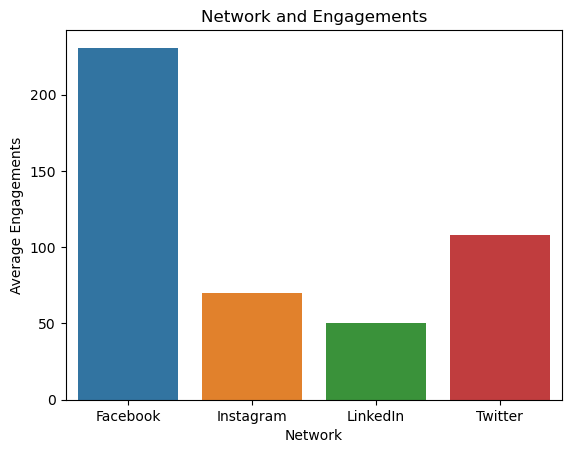

In [77]:
nwt_engagements = df.groupby('Network')['Engagements'].mean().reset_index()
sns.barplot(data=nwt_engagements, x='Network', y='Engagements')
plt.xlabel('Network')
plt.ylabel('Average Engagements')
plt.title('Network and Engagements')
plt.show()


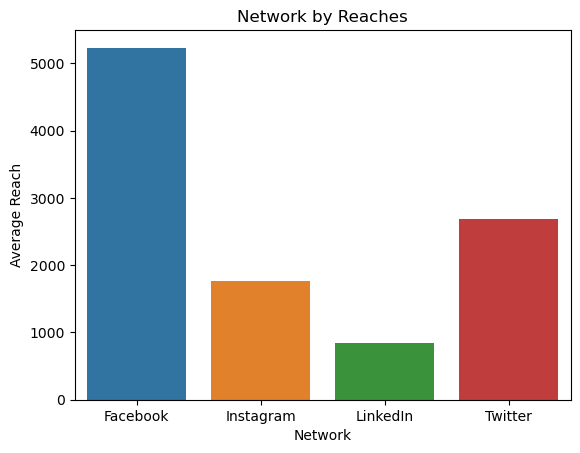

In [78]:
nwt_engagements = df.groupby('Network')['Reach'].mean().reset_index()
sns.barplot(data=nwt_engagements, x='Network', y='Reach')
plt.xlabel('Network')
plt.ylabel('Average Reach')
plt.title('Network by Reaches')
plt.show()


<Axes: xlabel='Network', ylabel='count'>

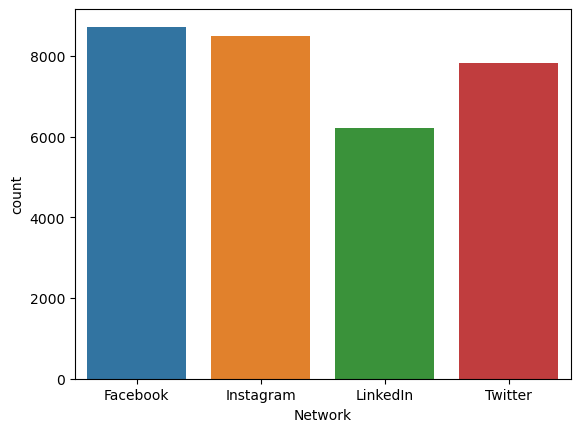

In [79]:
sns.countplot(x='Network', data=df)

In [80]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Engagement Rate (per Reach),HourofDay,TimeofPost,LenOftext,LengthofText,DayOfWeek
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,0.004938,1024.0,179.0,176.0,59.0,0.004938,17,Afternoon,143,Average,Saturday
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,92009.0,0.046715,5876.0,762.0,747.0,572.0,0.063863,10,Morning,89,Average,Saturday
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,84347.0,0.052888,4744.0,465.0,458.0,855.0,0.056244,21,Night,175,Average,Tuesday
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,78407.0,0.005625,445.0,102.0,101.0,11.0,0.005676,10,Morning,104,Average,Monday
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,74035.0,0.061621,4730.0,413.0,383.0,869.0,0.063889,10,Morning,56,Average,Sunday


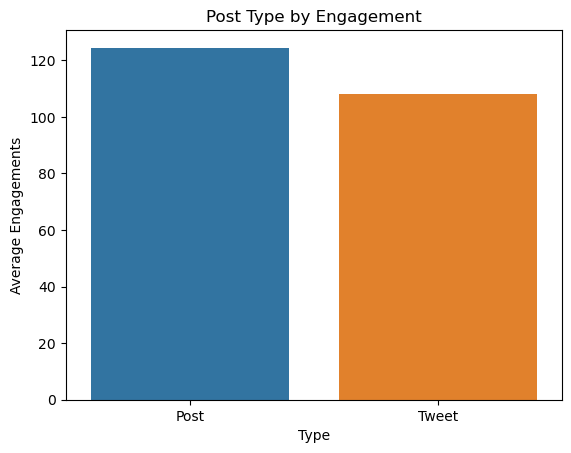

In [81]:
type_engagements = df.groupby('Post Type')['Engagements'].mean().reset_index()
sns.barplot(data=type_engagements, x='Post Type', y='Engagements')
plt.xlabel('Type')
plt.ylabel('Average Engagements')
plt.title('Post Type by Engagement')
plt.show()


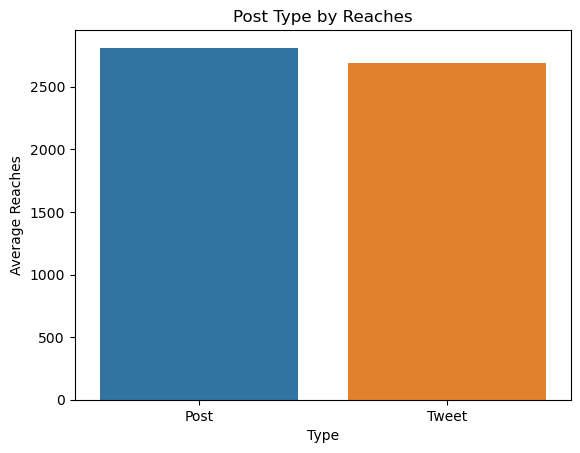

In [82]:
type_engagements = df.groupby('Post Type')['Reach'].mean().reset_index()
sns.barplot(data=type_engagements, x='Post Type', y='Reach')
plt.xlabel('Type')
plt.ylabel('Average Reaches')
plt.title('Post Type by Reaches')
plt.show()


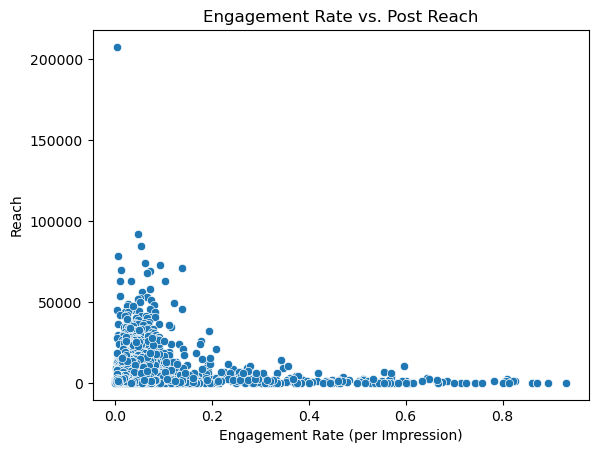

In [83]:
sns.scatterplot(data=df, x='Engagement Rate (per Impression)', y='Reach')
plt.xlabel('Engagement Rate (per Impression)')
plt.ylabel('Reach')
plt.title('Engagement Rate vs. Post Reach')
plt.show()


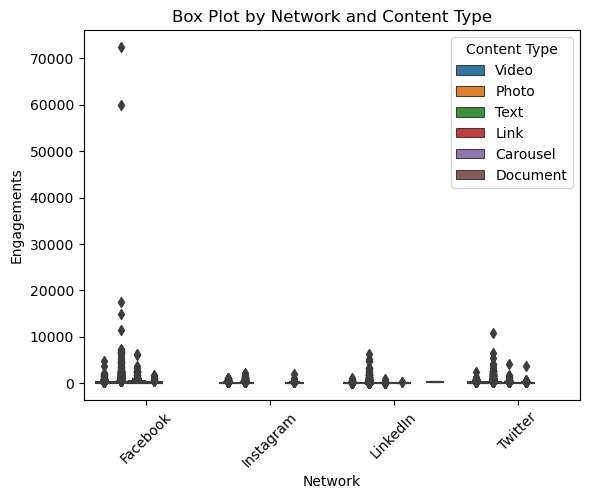

In [84]:
sns.boxplot(data=df, x='Network', y='Engagements', hue='Content Type')
plt.xlabel('Network')
plt.ylabel('Engagements')
plt.title('Box Plot by Network and Content Type')
plt.xticks(rotation=45)
plt.show()


### More Analysis

In [85]:
import scipy.stats as stats

# Create subsets of 'Reach' based on 'Network' categories
facebook_reach = df[df['Network'] == 'Facebook']['Reach']
linkedin_reach = df[df['Network'] == 'LinkedIn']['Reach']
instagram_reach = df[df['Network'] == 'Instagram']['Reach']
twitter_reach = df[df['Network'] == 'Twitter']['Reach']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(facebook_reach, linkedin_reach, instagram_reach, twitter_reach)

# Check the p-value to determine significance
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("The one-way ANOVA test is statistically significant. There are significant differences between groups.")
else:
    print("The one-way ANOVA test is not statistically significant. There are no significant differences between groups.")


The one-way ANOVA test is statistically significant. There are significant differences between groups.


#### There is a significant difference between the groups.<br>
This means that the type of Network Used has an effect on the number of people that will see it. <br> 
From the EDA, It seems the most reliable network to get more views or to reach a larger audience is Facebook.<br>
So if there is an ad that needs to reach a lot of people, Facebook is probably the best option.

In [86]:
# Create subsets of 'Reach' based on 'Length of Text' categories
average = df[df['LengthofText'] == 'Average']['Engagements']
lengthy = df[df['LengthofText'] == 'Lengthy']['Engagements']
short = df[df['LengthofText'] == 'Short']['Engagements']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(average, lengthy, short)

# Check the p-value to determine significance
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("The one-way ANOVA test is statistically significant. There are significant differences between groups.")
else:
    print("The one-way ANOVA test is not statistically significant. There are no significant differences between groups.")


The one-way ANOVA test is statistically significant. There are significant differences between groups.


In [87]:
average# Create subsets of 'Reach' based on 'Length of Text' categories
average = df[df['LengthofText'] == 'Average']['Impressions']
lengthy = df[df['LengthofText'] == 'Lengthy']['Impressions']
short = df[df['LengthofText'] == 'Short']['Impressions']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(average, lengthy, short)

# Check the p-value to determine significance
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("The one-way ANOVA test is statistically significant. There are significant differences between groups.")
else:
    print("The one-way ANOVA test is not statistically significant. There are no significant differences between groups.")


The one-way ANOVA test is statistically significant. There are significant differences between groups.


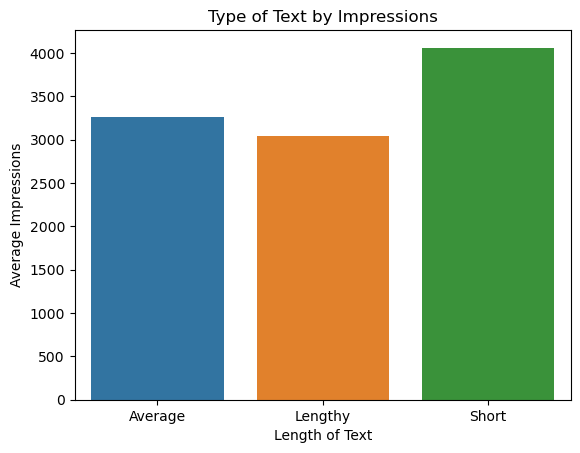

In [88]:
lot_engagements = df.groupby('LengthofText')['Impressions'].mean().reset_index()
sns.barplot(data=lot_engagements, x='LengthofText', y='Impressions')
plt.xlabel('Length of Text')
plt.ylabel('Average Impressions')
plt.title('Type of Text by Impressions')
plt.show()


#### Observations
Post with long text get fewer impressions than those with average or short texts.<br>
Also with the ANOVA statistics, There is a significant differnce between the groups. Naturally also, People tend to enjoy shorter and direct posts than lengthy, comprehensive ones.

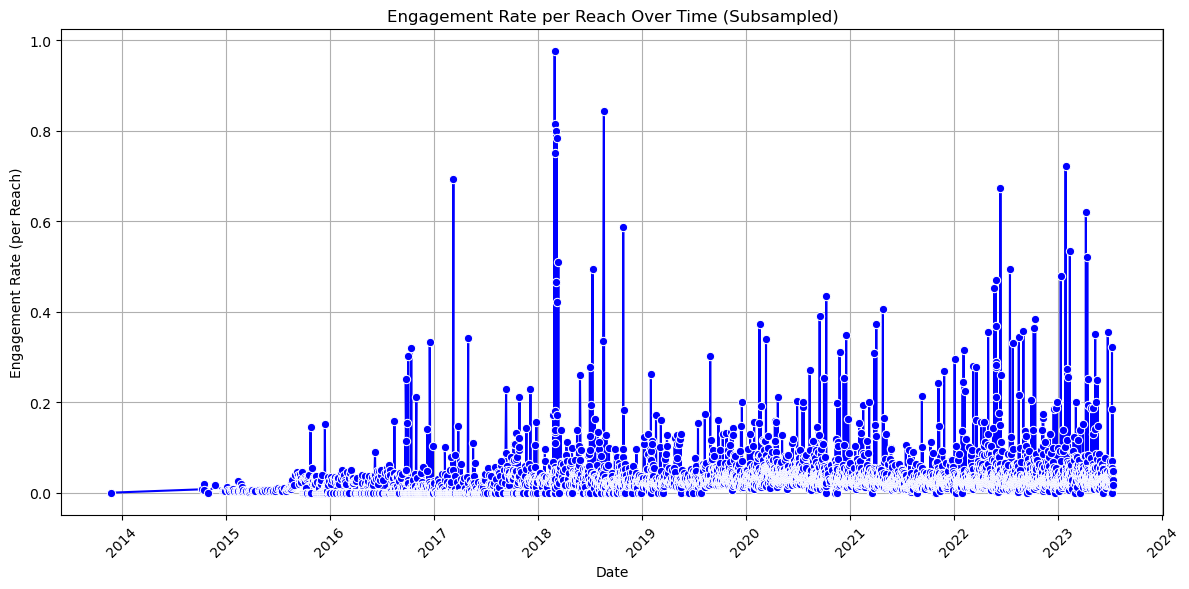

In [89]:
df2 = df.sort_values(by='Date')


subsampled_df = df2[::7]  # Adjust the step size as needed

# Create the line chart using Seaborn with the subsampled data
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=subsampled_df, x='Date', y='Engagement Rate (per Reach)', marker='o', color='b')
plt.title('Engagement Rate per Reach Over Time (Subsampled)')
plt.xlabel('Date')
plt.ylabel('Engagement Rate (per Reach)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

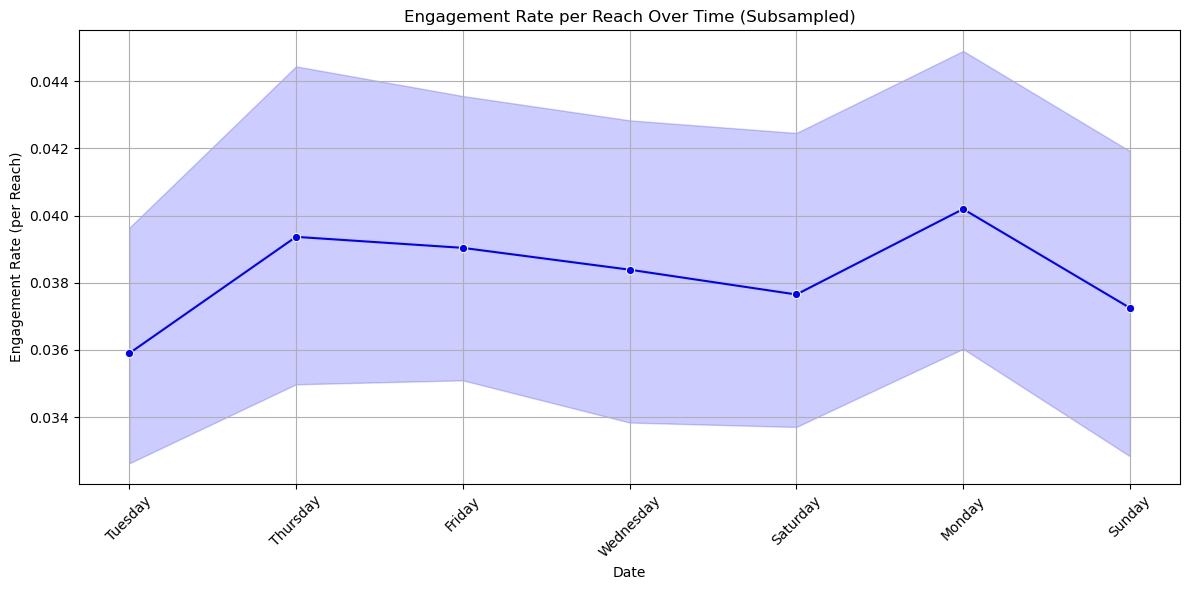

In [90]:
df2 = df.sort_values(by='Date')


subsampled_df = df2[::7]  # Adjust the step size as needed

# Create the line chart using Seaborn with the subsampled data
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=subsampled_df, x='DayOfWeek', y='Engagement Rate (per Reach)', marker='o', color='b')
plt.title('Engagement Rate per Reach Over Time (Subsampled)')
plt.xlabel('Date')
plt.ylabel('Engagement Rate (per Reach)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

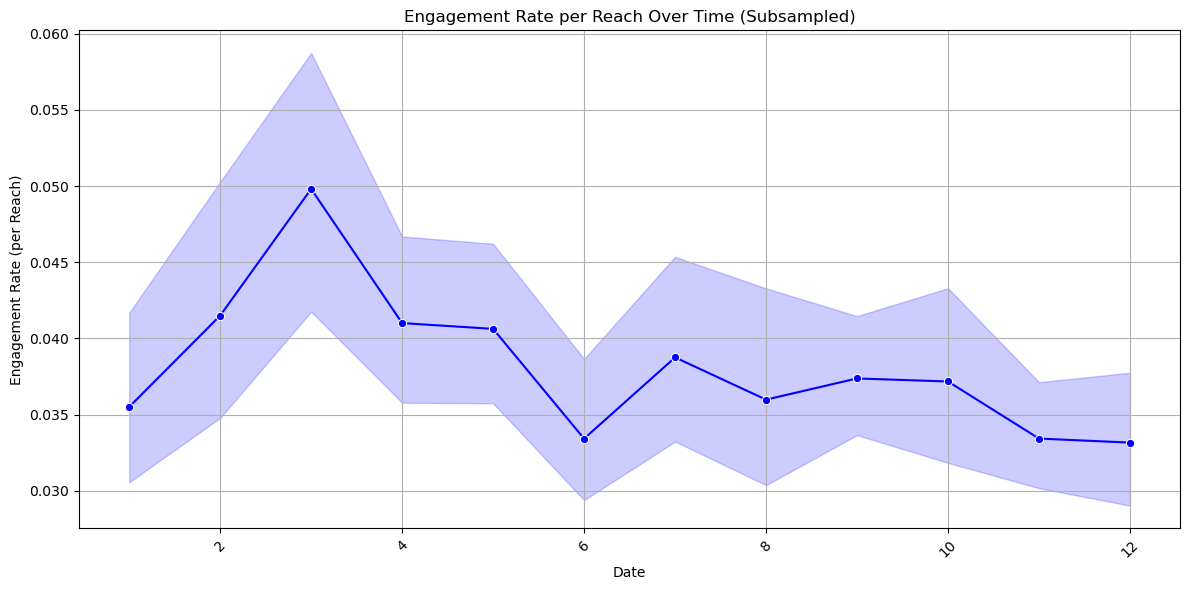

In [91]:
df2 = df.sort_values(by='Date')


subsampled_df = df2[::7]  # Adjust the step size as needed

# Create the line chart using Seaborn with the subsampled data
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x=subsampled_df['Date'].dt.month, y=subsampled_df['Engagement Rate (per Reach)'], marker='o', color='b')
plt.title('Engagement Rate per Reach Over Time (Subsampled)')
plt.xlabel('Date')
plt.ylabel('Engagement Rate (per Reach)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

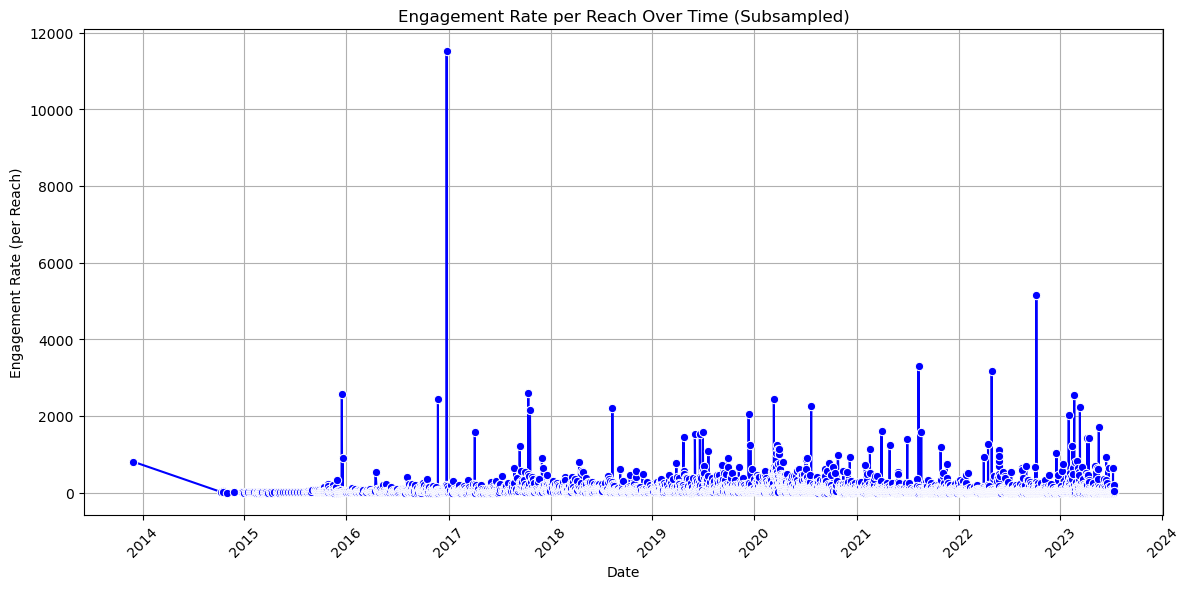

In [92]:
df2 = df.sort_values(by='Date')


subsampled_df = df2[::7]  # Adjust the step size as needed

# Create the line chart using Seaborn with the subsampled data
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(data=subsampled_df, x='Date', y='Engagements', marker='o', color='b')
plt.title('Engagement Rate per Reach Over Time (Subsampled)')
plt.xlabel('Date')
plt.ylabel('Engagement Rate (per Reach)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

In [93]:
df['Year'] = df['Date'].dt.year

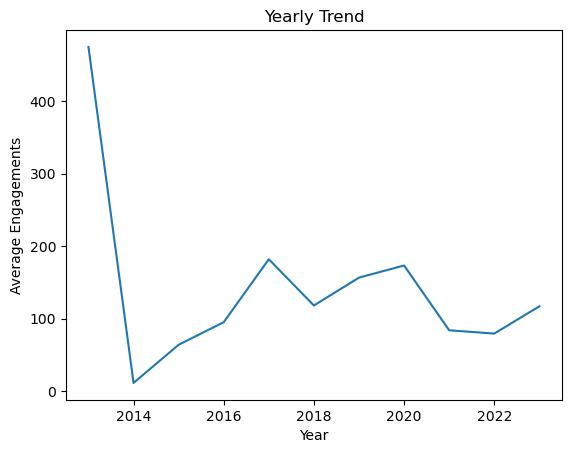

In [94]:
yearly_engagements = df.groupby('Year')['Engagements'].mean().reset_index()
sns.lineplot(data=yearly_engagements, x='Year', y='Engagements')
plt.xlabel('Year')
plt.ylabel('Average Engagements')
plt.title('Yearly Trend')
plt.show()


In [95]:
yearly_engagements

,Year,Engagements
0,2013,475.000000
1,2014,11.232143
2,2015,63.893805
3,2016,95.055336
4,2017,181.935116
5,2018,118.069976
6,2019,156.600000
7,2020,173.287312
8,2021,83.911715
9,2022,79.320827


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31255 entries, 0 to 8417
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              31255 non-null  datetime64[ns]
 1   Post ID                           31255 non-null  object        
 2   Network                           31255 non-null  object        
 3   Post Type                         31255 non-null  object        
 4   Content Type                      31255 non-null  object        
 5   Profile                           31255 non-null  object        
 6   Sent by                           31255 non-null  object        
 7   Link                              31228 non-null  object        
 8   Post                              31255 non-null  object        
 9   Impressions                       31255 non-null  float64       
 10  Reach                             31255 non-nul

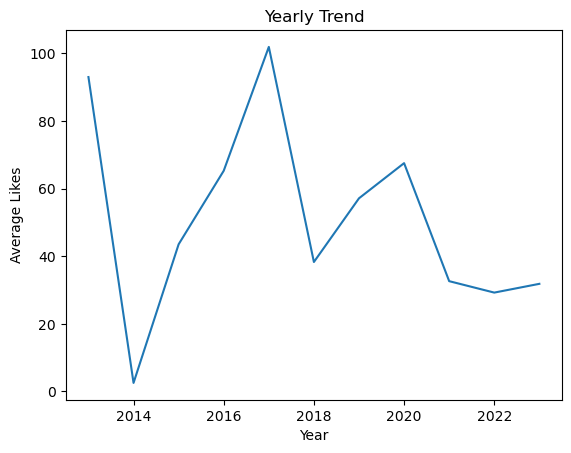

In [97]:
yearly_engagements = df.groupby('Year')['Likes'].mean().reset_index()
sns.lineplot(data=yearly_engagements, x='Year', y='Likes')
plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.title('Yearly Trend')
plt.show()


Text(0.5, 1.0, 'Engagements VS reach')

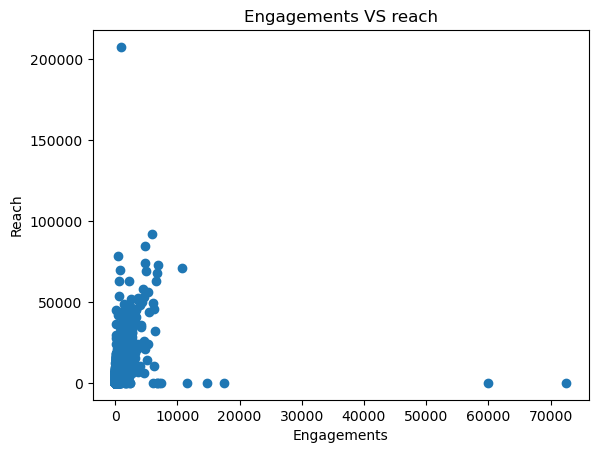

In [98]:
plt.scatter(x=df.Engagements, y=df.Reach)
plt.xlabel('Engagements')
plt.ylabel('Reach')
plt.title('Engagements VS reach')

In [99]:
df[df['Engagements'] > 50000].index

Int64Index([7884, 7891], dtype='int64')

In [100]:
df.drop(df[df['Engagements'] > 50000].index, axis=0, inplace=True)

In [101]:
df[df['Reach'] > 150000].Post

0    We celebrated recently with Novare, one of our...
Name: Post, dtype: object

In [102]:
### CREATING AN HASHTAGS COLUMN TO CHECK IF HASHTAGS HAS AN INFLUNCE IN REACH
import re
def Hashtags(x):
    y = x.split('#')
    try:
        j = y[1].replace('\n', '')
        j = j.split(' ')[0]
    except:
        j = 'NoHastags'
    return j

In [103]:
df['Hashtags'] = df['Post'].apply(Hashtags)

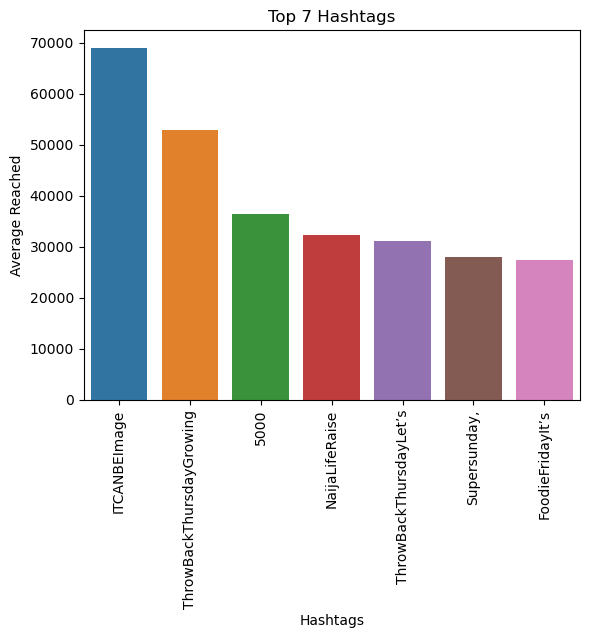

In [104]:
Hashtags_reach = df.groupby('Hashtags')['Reach'].mean().reset_index()
Hashtags_reach.sort_values(by='Reach', ascending = False, inplace = True)
Hashtags_reach = Hashtags_reach.head(7)
sns.barplot(data=Hashtags_reach, x='Hashtags', y='Reach')
plt.xlabel('Hashtags')
plt.ylabel('Average Reached')
plt.title('Top 7 Hashtags')
plt.xticks(rotation = 90)
plt.show()

#### Hashtags
The #ITCANBE has more reaches than the others along with the #ThrowbackThursday.<br>
The Hashtags can help grow more reaches would would be promising to get more viewers and more customers


### Person In charge of post

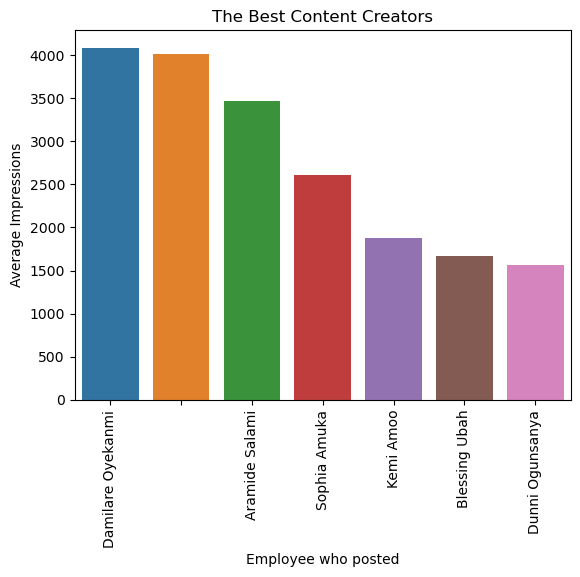

In [105]:
Person_Impress = df.groupby('Sent by')['Impressions'].mean().reset_index()
Person_Impress.sort_values(by='Impressions', ascending = False, inplace = True)
Person_Impress = Person_Impress.head(7)
sns.barplot(data=Person_Impress, x='Sent by', y='Impressions')
plt.xlabel('Employee who posted')
plt.ylabel('Average Impressions')
plt.title('The Best Content Creators')
plt.xticks(rotation = 90)
plt.show()

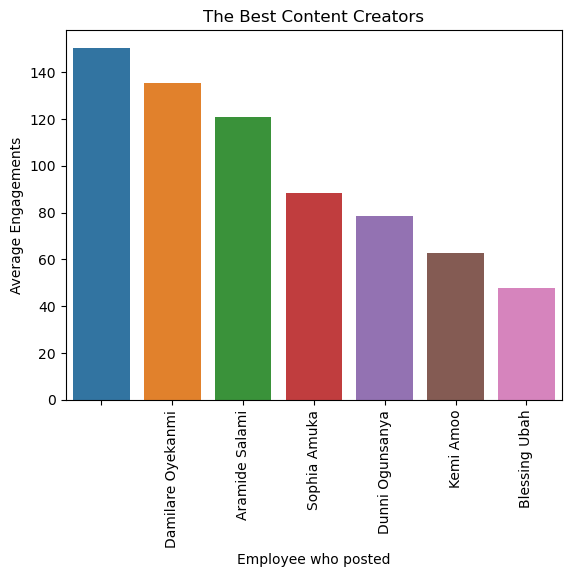

In [106]:
Person_Impress = df.groupby('Sent by')['Engagements'].mean().reset_index()
Person_Impress.sort_values(by='Engagements', ascending = False, inplace = True)
Person_Impress = Person_Impress.head(7)
sns.barplot(data=Person_Impress, x='Sent by', y='Engagements')
plt.xlabel('Employee who posted')
plt.ylabel('Average Engagements')
plt.title('The Best Content Creators')
plt.xticks(rotation = 90)
plt.show()

#### Insights
Damilare Oyekanmi seems to get more impressions whenever he posts contents so he must have a high skill in content creation.<br>
We will also investigate more on this.


In [107]:
df['Sent by'].value_counts()

                     15358
Blessing Ubah         5620
Sophia Amuka          5141
Aramide Salami        2343
Damilare Oyekanmi     1884
Kemi Amoo              780
Dunni Ogunsanya        117
Lilian Ibekwe            2
Rebecca Oyebode          1
Kanayo Obiano            1
Philip Nwagwunor         1
Patience Nnaji           1
Name: Sent by, dtype: int64

Blessing Ubah posted a lot more than the rest but seems to get a lower impresssion than the likes of Aramide Salami and Damilare Oyekanmi who posted fewer.

<Axes: >

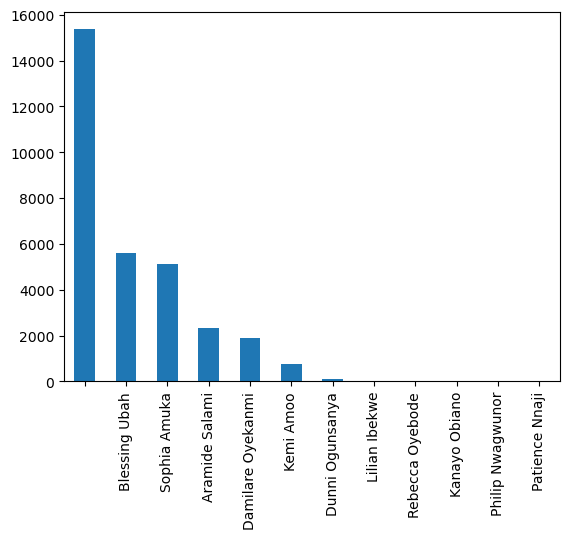

In [108]:
df['Sent by'].value_counts().plot(kind ='bar')

In [125]:
np.mean(df[df['Network'] == "Instagram"]['Likes']), sum(df[df['Network'] == "Instagram"]['Likes'])

(59.72748675691583, 507385.0)